### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [342]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [346]:
data = pd.read_csv('data/coupons.csv')

In [348]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [356]:
data.car.unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [358]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [360]:
data.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [362]:
# car columns has only 108 non-null values and most of the values are NaN
data= data.drop(columns=['car'])

In [364]:
# the column toCoupon_GEQ5min has only one single value: 1.  
#According to the dataset description, this column means driving distance to the restaurant/bar for using the coupon is greater than 5 minutes, so all the restaurant/bars are at least five minutes away from the driver
data = data.drop(columns=['toCoupon_GEQ5min'])

In [366]:
na_columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data = data.dropna(subset=na_columns)

In [95]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,never,less1,4~8,4~8,less1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [368]:
print(data[data['Y'] == 1].size / data.size)

0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

In [372]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

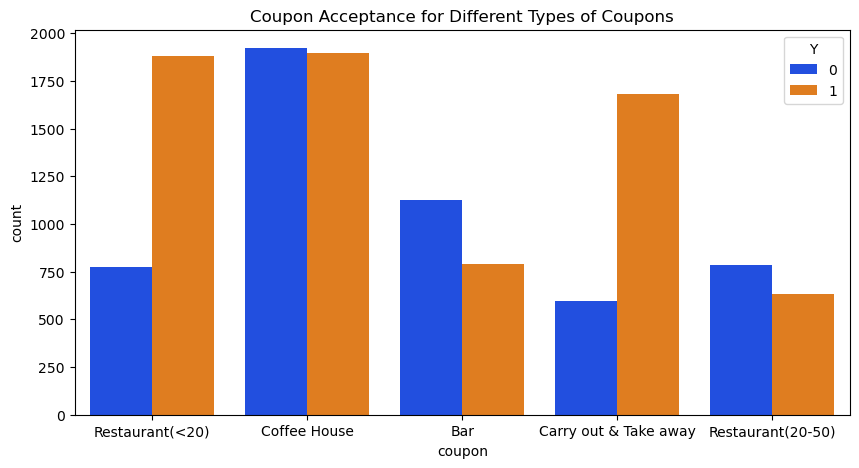

In [379]:
plt.figure(figsize=(10,5))
sns.countplot(data, x="coupon", hue="Y", palette='bright', alpha = 1).set_title('Coupon Acceptance for Different Types of Coupons')
plt.savefig("images/module5/coupon_acceptance.png");

6. Use a histogram to visualize the temperature column.

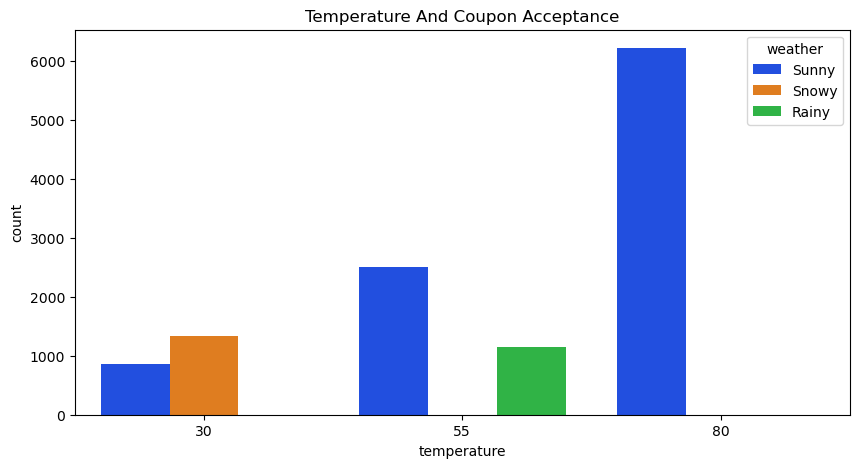

In [381]:
plt.figure(figsize=(10,5))
sns.countplot(data, x="temperature", hue="weather", palette='bright', alpha = 1).set_title('Temperature And Coupon Acceptance')
plt.savefig("images/module5/temperature_coupon_acceptance.png");

Most Coupon Acceptance is when the weather is Sunny

At 80F, temperature is always Sunny

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [158]:
df_bar = data[data['coupon']=='Bar']

2. What proportion of bar coupons were accepted?


In [166]:
df_bar[df_bar['Y'] == 1].size/df_bar.size

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [168]:
df_bar['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [182]:
barFrequency = ['never', 'less1', '1~3']
bar_frequency_less = df_bar.query('Bar in @barFrequency')
bar_frequency_more = df_bar.query('Bar not in @barFrequency')
print("Acceptance Rate who went to a bar 3 or fewer times a month : ", bar_frequency_less[bar_frequency_less['Y']==1].size/bar_frequency_less.size)
print("Acceptance Rate who went to a bar more than 3 times a month : ", bar_frequency_more[bar_frequency_more['Y']==1].size/bar_frequency_more.size)

Acceptance Rate who went to a bar 3 or fewer times a month :  0.37267441860465117
Acceptance Rate who went to a bar more than 3 times a month :  0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [186]:
df_bar['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [198]:
df_bar['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [204]:
df_bar['age'] = df_bar['age'].replace('below21','20')
df_bar['age'] = df_bar['age'].replace('50plus','51')
df_bar['age']= df_bar['age'].astype(int)

In [212]:
bar_more_than_once = ['1~3', '4~8', 'gt8']
df_bar_more_than_once = df_bar.query('Bar in @bar_more_than_once and age > 25')
print("Bar coupons acceptance rate for drivers who visit the bar more than once a month and are over 25: ", df_bar_more_than_once[df_bar_more_than_once['Y'] == 1].size / df_bar_more_than_once.size)
df_bar_not_more_than_once = df_bar.query('Bar not in @bar_more_than_once or age < 25')
print("Bar coupons acceptance rate for drivers who visit the bar less than 1 time a month and age of 25 or younger: ", df_bar_not_more_than_once[df_bar_not_more_than_once['Y'] == 1].size / df_bar_not_more_than_once.size)

Bar coupons acceptance rate for drivers who visit the bar more than once a month and are over 25:  0.6898263027295285
Bar coupons acceptance rate for drivers who visit the bar less than 1 time a month and age of 25 or younger:  0.33774834437086093


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [218]:
df_bar["passanger"].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [228]:
df_bar_criteria1 = df_bar.query('Bar in @bar_more_than_once and passanger !="Kid(s)" and occupation!="Farming Fishing & Forestry"')
print("Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: ", df_bar_criteria1[df_bar_criteria1["Y"]==1].size/df_bar_criteria1.size) 
df_bar_criteria2 = df_bar.query('Bar in @bar_more_than_once and passanger =="Kid(s)" and occupation!="Farming Fishing & Forestry"')
print("Acceptance rate between drivers who go to bars more than once a month and had passengers that kids and had occupations farming, fishing, or forestry: ", df_bar_criteria2[df_bar_criteria2["Y"]==1].size/df_bar_criteria2.size) 

Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry:  0.7094339622641509
Acceptance rate between drivers who go to bars more than once a month and had passengers that kids and had occupations farming, fishing, or forestry:  0.38095238095238093


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [230]:
df_bar['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [252]:
df_bar['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [254]:
df_bar['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [270]:
df_bar_criteria3 = df_bar.query('Bar in @bar_more_than_once and passanger != "Kid(s)" and maritalStatus != "Widowed"')
print('Acceptance rate for those go to bar more than once per month, had passengers that were not a kid and were not widowed: ', df_bar_criteria3[df_bar_criteria3['Y']== 1].size/df_bar_criteria3.size)
df_bar_under30 =  df_bar.query('Bar in @bar_more_than_once and age <30')
print("Bar coupons acceptance rate for those who visit the bar more than once a month and are under 30: ", df_bar_under30[df_bar_under30['Y'] == 1].size / df_bar_under30.size)
restaurant_frequency = ['4~8', 'gt8']
income_under50 = ['$12500 - $24999','$37500 - $49999', '$25000 - $37499','Less than $12500']
df_cheap_restaurants = df_bar.query('Bar in @bar_more_than_once and RestaurantLessThan20 in ["4~8", "gt8"] and income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]')
print("Bar coupons acceptance rate for those who visit the bar more than once a month, go to cheap restaurants more than 4 times a month, and have an income less than 50K: ", df_cheap_restaurants[df_cheap_restaurants['Y'] == 1].size / df_cheap_restaurants.size)


Acceptance rate for those go to bar more than once per month, had passengers that were not a kid and were not widowed:  0.7094339622641509
Bar coupons acceptance rate for those who visit the bar more than once a month and are under 30:  0.7195121951219512
Bar coupons acceptance rate for those who visit the bar more than once a month, go to cheap restaurants more than 4 times a month, and have an income less than 50K:  0.7716535433070866


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

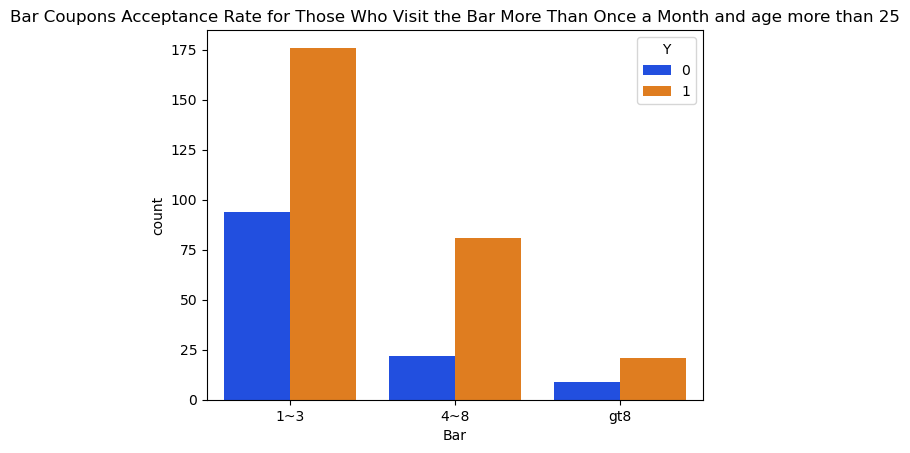

In [383]:
sns.countplot(df_bar_more_than_once, x="Bar", hue="Y", palette='bright', order=['1~3', '4~8', 'gt8']).set_title('Bar Coupons Acceptance Rate for Those Who Visit the Bar More Than Once a Month and age more than 25')
plt.savefig("images/module5/bar_coupon_acceptance_age25.png");

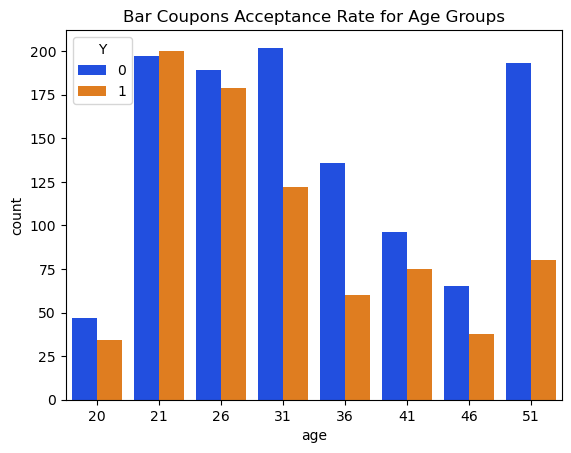

In [385]:
sns.countplot(df_bar, x="age", hue="Y", palette='bright').set_title('Bar Coupons Acceptance Rate for Age Groups')
plt.savefig("images/module5/bar_coupon_acceptance_age_group.png");

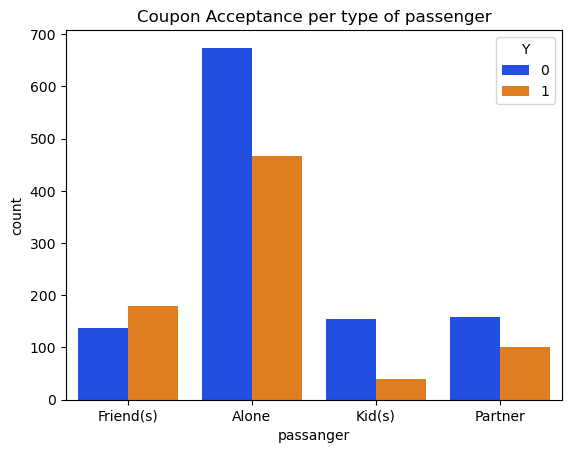

In [387]:
sns.countplot(df_bar, x='passanger', hue='Y', palette='bright').set_title('Coupon Acceptance per type of passenger')
plt.savefig("images/module5/bar_coupon_acceptance_passenger.png");

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [391]:
df_carry_away = data[data['coupon'] == 'Carry out & Take away']

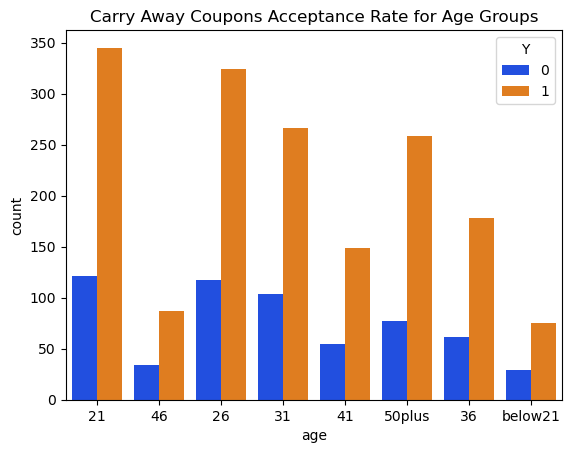

In [393]:
sns.countplot(df_carry_away, x='age', hue='Y', palette='bright').set_title('Carry Away Coupons Acceptance Rate for Age Groups')
plt.savefig("images/module5/carryaway_coupon_acceptance_age_group.png");

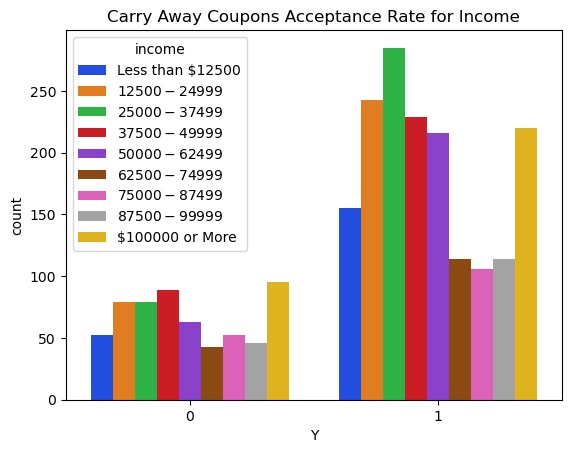

In [395]:
hue_order =['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499',
            '$62500 - $74999', '$75000 - $87499','$87500 - $99999','$100000 or More']
sns.countplot(df_carry_away, x='Y', hue='income', hue_order=hue_order, palette='bright').set_title('Carry Away Coupons Acceptance Rate for Income')
plt.savefig("images/module5/carryaway_coupon_acceptance_income.png");

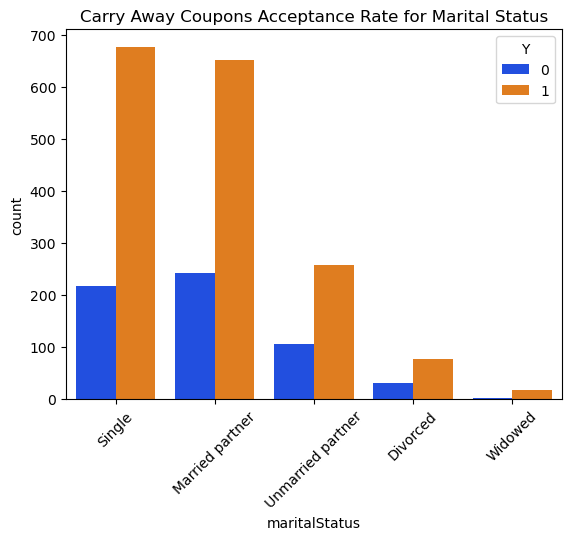

In [397]:
sns.countplot(df_carry_away, x='maritalStatus', hue='Y', palette='bright', alpha = 1).set_title('Carry Away Coupons Acceptance Rate for Marital Status')
plt.xticks(rotation=45)
plt.savefig("images/module5/carryaway_coupon_acceptance_income.png");

Conclusion:
From "Coupon Acceptance for Different Types of Coupons" barplot, it is determined Carry out & Take away and Restaurant(<20) coupons has the most acceptance.
From the Analysis on Carry out & Take away coupons
•	Singles Accept the most Carry out & Take away coupons
•	The age limit of customers who accept the most Carry out & Take away coupon is 21
•	The income of customers who accept the most Carry out & Take away coupon is between 25000 - 37499
